## Algorithm training, testing, and validation

In [1]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set() # Revert to matplotlib defaults
plt.rcParams['figure.figsize'] = (16, 12)

In [2]:
# load clean dataset

cleaned_df = pd.read_csv('/Users/keszhang/Desktop/working/HW-3-Solar-Enery-Project/datasets/cleaned/cleaned_solar_irradiation.csv')
cleaned_df.head()

,Unnamed: 0,MonthPE,Date,Daily_Temp,Daily_Precip,Daily_Humidity,Daily_Pressure,Daily_WindDir,Daily_WindSpeed,Daily_DNI,Daily_DHI,Daily_radiation
0,2019-12-30,12,2019-12-30,10.725,14.4125,72.25,1014.2125,127.0,1.4375,572.125,82.875,305.125
1,2019-12-31,12,2019-12-31,12.570,14.8700,64.80,1014.7800,163.6,1.6300,487.800,85.500,259.900
2,2020-01-01,1,2020-01-01,13.060,24.8000,78.30,1014.7700,256.4,2.7100,146.500,135.300,185.500
3,2020-01-02,1,2020-01-02,12.490,13.8400,72.40,1014.3900,324.7,2.6300,461.000,80.900,261.400
4,2020-01-03,1,2020-01-03,12.400,9.6800,69.90,1016.6500,97.9,2.3900,537.700,76.900,274.400


In [3]:
# display column names
cleaned_df.columns

Index(['Unnamed: 0', 'MonthPE', 'Date', 'Daily_Temp', 'Daily_Precip',
       'Daily_Humidity', 'Daily_Pressure', 'Daily_WindDir', 'Daily_WindSpeed',
       'Daily_DNI', 'Daily_DHI', 'Daily_radiation'],
      dtype='object')

In [5]:
# select features
cleaned_df= cleaned_df[['MonthPE', 'Date', 'Daily_Temp', 'Daily_Precip', 'Daily_Humidity', 'Daily_Pressure',\
                        'Daily_WindDir', 'Daily_WindSpeed', 'Daily_DNI', 'Daily_DHI', 
                        'Daily_radiation']]

In [7]:
# Feature Engineering of Time Series Column
cleaned_df['Date'] = pd.to_datetime(cleaned_df['Date'], format='%Y-%m-%d')
cleaned_df['year'] = cleaned_df['Date'].dt.year
cleaned_df['month'] = cleaned_df['Date'].dt.month
cleaned_df['day'] = cleaned_df['Date'].dt.day

In [9]:
# Feature selection
cleaned_df = cleaned_df[['month', 'day', 'Daily_Temp', 'Daily_Precip', 'Daily_Humidity',
       'Daily_Pressure', 'Daily_WindDir', 'Daily_WindSpeed', 'Daily_DNI', 'Daily_DHI',
       'Daily_radiation']]

In [10]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   month            734 non-null    int64  
 1   day              734 non-null    int64  
 2   Daily_Temp       734 non-null    float64
 3   Daily_Precip     734 non-null    float64
 4   Daily_Humidity   734 non-null    float64
 5   Daily_Pressure   734 non-null    float64
 6   Daily_WindDir    734 non-null    float64
 7   Daily_WindSpeed  734 non-null    float64
 8   Daily_DNI        734 non-null    float64
 9   Daily_DHI        734 non-null    float64
 10  Daily_radiation  734 non-null    float64
dtypes: float64(9), int64(2)
memory usage: 63.2 KB


In [11]:
cleaned_df.isnull().sum()

month              0
day                0
Daily_Temp         0
Daily_Precip       0
Daily_Humidity     0
Daily_Pressure     0
Daily_WindDir      0
Daily_WindSpeed    0
Daily_DNI          0
Daily_DHI          0
Daily_radiation    0
dtype: int64

In [12]:
# drop the missing value
# cleaned_df.dropna(inplace=True)

### Model training and testing

In [13]:
cleaned_df.head()

,month,day,Daily_Temp,Daily_Precip,Daily_Humidity,Daily_Pressure,Daily_WindDir,Daily_WindSpeed,Daily_DNI,Daily_DHI,Daily_radiation
0,12,30,10.725,14.4125,72.25,1014.2125,127.0,1.4375,572.125,82.875,305.125
1,12,31,12.570,14.8700,64.80,1014.7800,163.6,1.6300,487.800,85.500,259.900
2,1,1,13.060,24.8000,78.30,1014.7700,256.4,2.7100,146.500,135.300,185.500
3,1,2,12.490,13.8400,72.40,1014.3900,324.7,2.6300,461.000,80.900,261.400
4,1,3,12.400,9.6800,69.90,1016.6500,97.9,2.3900,537.700,76.900,274.400


In [14]:
# import libraries for algorithms traininng, and metrics to judge performance
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [15]:
# produces a 70%, 15%, 15% split for training, validation and test sets
train_data, validation_data, test_data = np.split(cleaned_df.sample(frac = 1), 
                                                  [int(.7 * len(cleaned_df)), 
                                                   int(.85 * len(cleaned_df))])

In [16]:
# # convert dataframes to .csv and save locally
train_data.to_csv('~/Desktop/working/HW-3-Solar-Enery-Project/datasets/cleaned/train.csv', header = True, index = False)
validation_data.to_csv('~/Desktop/working/HW-3-Solar-Enery-Project/datasets/cleaned/validation.csv', header=True, index = False)
test_data.to_csv('~/Desktop/working/HW-3-Solar-Enery-Project/datasets/cleaned/test.csv', header = True, index = False)

In [17]:
train_data.head()

,month,day,Daily_Temp,Daily_Precip,Daily_Humidity,Daily_Pressure,Daily_WindDir,Daily_WindSpeed,Daily_DNI,Daily_DHI,Daily_radiation
390,1,23,9.827273,12.345455,74.000000,1008.290909,232.545455,2.518182,454.363636,87.000000,272.545455
155,6,2,18.193750,23.493750,64.625000,1009.818750,236.812500,2.556250,633.875000,90.000000,534.750000
329,11,23,12.100000,16.500000,77.600000,1011.300000,270.100000,2.450000,432.700000,103.200000,282.200000
40,2,8,12.100000,8.027273,71.181818,1012.645455,280.818182,2.445455,506.181818,104.272727,340.909091
216,8,2,16.666667,13.426667,74.400000,1010.960000,240.266667,3.606667,460.400000,133.066667,488.733333


In [18]:
# training data
# train_df = pd.read_csv('~/Desktop/working/HW-3-Solar-Enery-Project/datasets/cleaned/train.csv')
X_train = train_data.drop(['Daily_radiation'], axis = 1)
y_train = train_data['Daily_radiation']

# test data
# test_df = pd.read_csv('~/Desktop/working/HW-3-Solar-Enery-Project/datasets/cleaned/test.csv')
X_test = test_data.drop(['Daily_radiation'], axis = 1)
y_test = test_data['Daily_radiation']

In [43]:
# check if theres any skewed data
from scipy.stats import skew
skewed_features = []
for col in X_train.columns.to_list()[:-2]:    
    if col != 'Radiation':
        if((min(X_train[col]) > 0)) & (abs(skew(X_train[col])) > 0):
            skewed_features.append(col)
        
skewed_features

['month',
 'day',
 'Daily_Temp',
 'Daily_Precip',
 'Daily_Humidity',
 'Daily_Pressure',
 'Daily_WindDir',
 'Daily_WindSpeed']

### Linear Regression

In [20]:
# Setup the pipeline steps for linear regression
steps = [('scaler', StandardScaler()), ('lr', LinearRegression())]
# Create the pipeline
pipeline_lr = Pipeline(steps)
# Fit the pipeline to the train set
pipeline_lr.fit(X_train, y_train)
# Predict the labels of the test set
y_pred_lr = pipeline_lr.predict(X_test)

In [21]:
# Evaluating algorithm performance
mse = mean_squared_error(y_test, y_pred_lr, squared = False)

mae = mean_absolute_error(y_test, y_pred_lr)

print('r2_score: ', r2_score(y_test, y_pred_lr))

print('Root Mean Squared Error: %.2f' % np.sqrt(mse))

print('Root Mean Absolute Error: %.2f' % np.sqrt(mae))

r2_score:  0.8879723669160816
Root Mean Squared Error: 6.53
Root Mean Absolute Error: 5.85


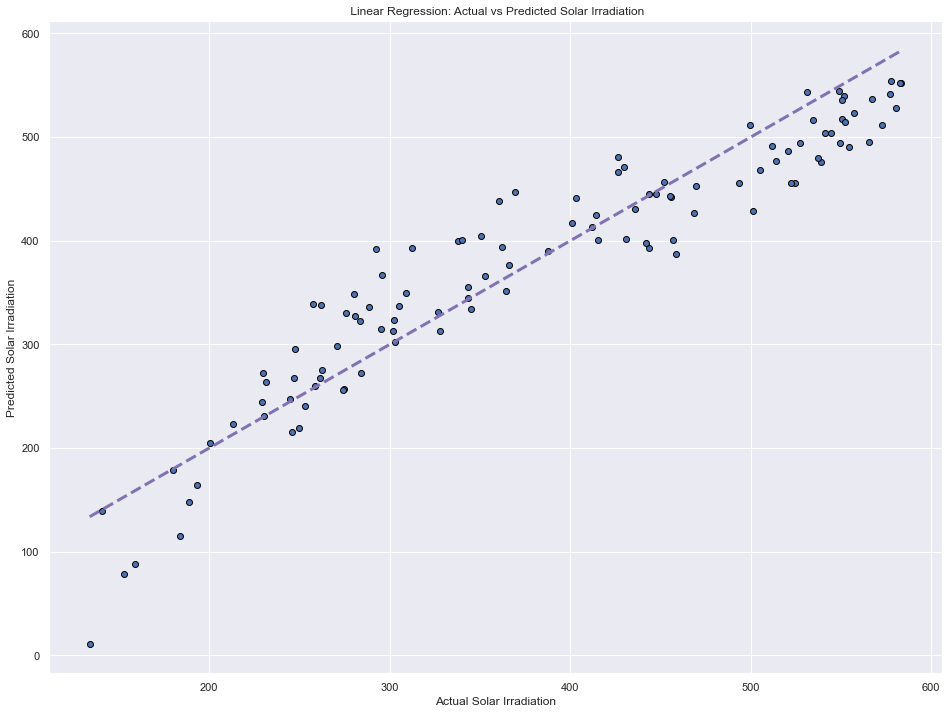

In [22]:
# Run the model against the test data presented through a plot
fig, pX = plt.subplots()

pX.scatter(y_test, y_pred_lr, edgecolors = (0, 0, 0))
pX.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'm--', lw = 3)
pX.set_xlabel('Actual Solar Irradiation')
pX.set_ylabel('Predicted Solar Irradiation')
pX.set_title(" Linear Regression: Actual vs Predicted Solar Irradiation")
plt.show() 

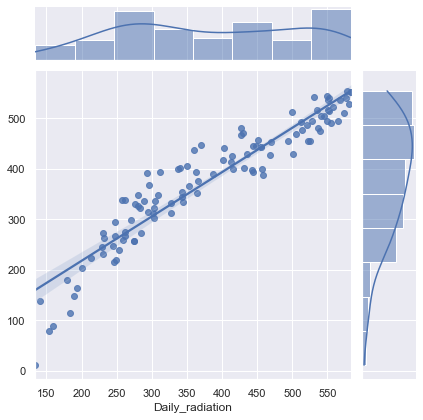

In [29]:
sns.jointplot(x=y_test, y=y_pred_lr, kind = 'reg')
plt.show();

### Random Forest Regressor

In [30]:
# Setup the pipeline steps for random forest: steps
steps = [('scaler', StandardScaler()), ('rfr', RandomForestRegressor())]
# Create the pipeline: pipeline
pipeline_rfr = Pipeline(steps)
# Fit the pipeline to the train set
pipeline_rfr.fit(X_train, y_train)
# Predict the labels of the test set
y_pred_rfr = pipeline_rfr.predict(X_test)

In [31]:
# Evaluating algorithm performance
mse_rf = mean_squared_error(y_test, y_pred_rfr, squared = False)

mae_rf = mean_absolute_error(y_test, y_pred_rfr)

print('r2_score: ', r2_score(y_test, y_pred_rfr))

print('Root Mean Squared Error: %.2f' % np.sqrt(mse_rf))

print('Root Mean Absolute Error: %.2f' % np.sqrt(mae_rf))

r2_score:  0.9784464695833116
Root Mean Squared Error: 4.33
Root Mean Absolute Error: 3.80


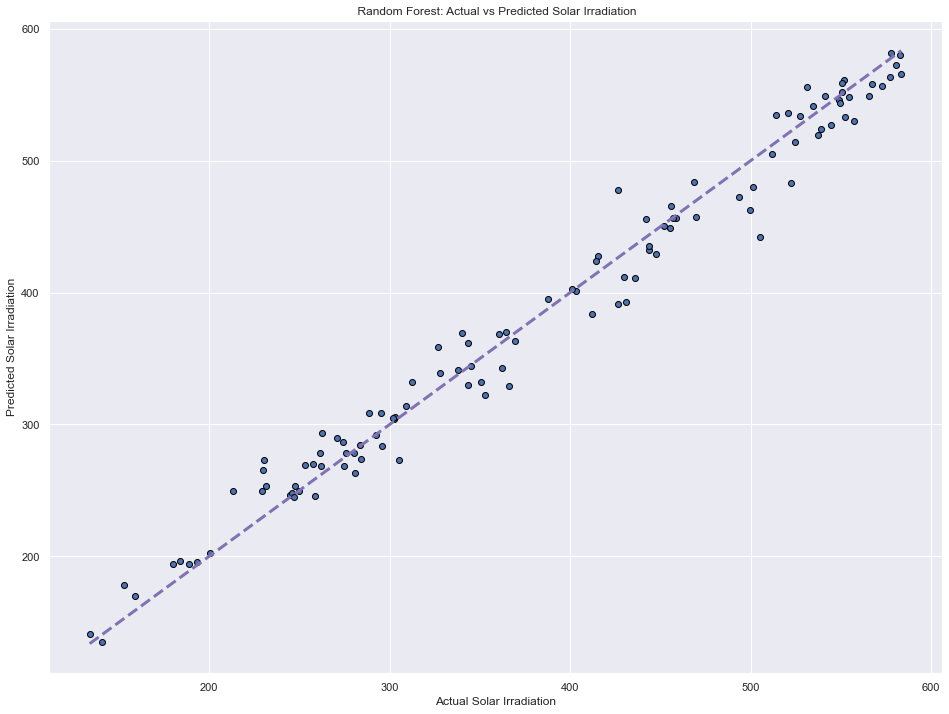

In [32]:
# Run the model against the test data presented through a plot
fig, pX = plt.subplots()

pX.scatter(y_test, y_pred_rfr, edgecolors = (0, 0, 0))
pX.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'm--', lw = 3)
pX.set_xlabel('Actual Solar Irradiation')
pX.set_ylabel('Predicted Solar Irradiation')
pX.set_title(" Random Forest: Actual vs Predicted Solar Irradiation")
plt.show()

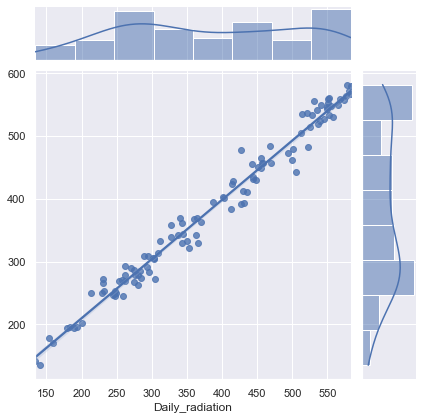

In [33]:
sns.jointplot(x=y_test, y=y_pred_rfr, kind = 'reg')
plt.show()

### GradientBoosting Regressor

In [34]:
# Setup the pipeline steps: steps
steps = [('scaler', StandardScaler()), ('gbr', GradientBoostingRegressor())]
# Create the pipeline: pipeline
pipeline_gbr = Pipeline(steps)
# Fit the pipeline to the train set
pipeline_gbr.fit(X_train, y_train)
# Predict the labels of the test set
y_pred_gbr = pipeline_gbr.predict(X_test)

In [35]:
# Evaluating algorithm performance
mse_gr = mean_squared_error(y_test, y_pred_gbr, squared = False)

mae_gr = mean_absolute_error(y_test, y_pred_gbr)

print('r2_score: ', r2_score(y_test, y_pred_gbr))

print('Root Mean Squared Error: %.2f' % np.sqrt(mse_gr))

print('Root Mean Absolute Error: %.2f' % np.sqrt(mae_gr))

r2_score:  0.9773120456212437
Root Mean Squared Error: 4.38
Root Mean Absolute Error: 3.80


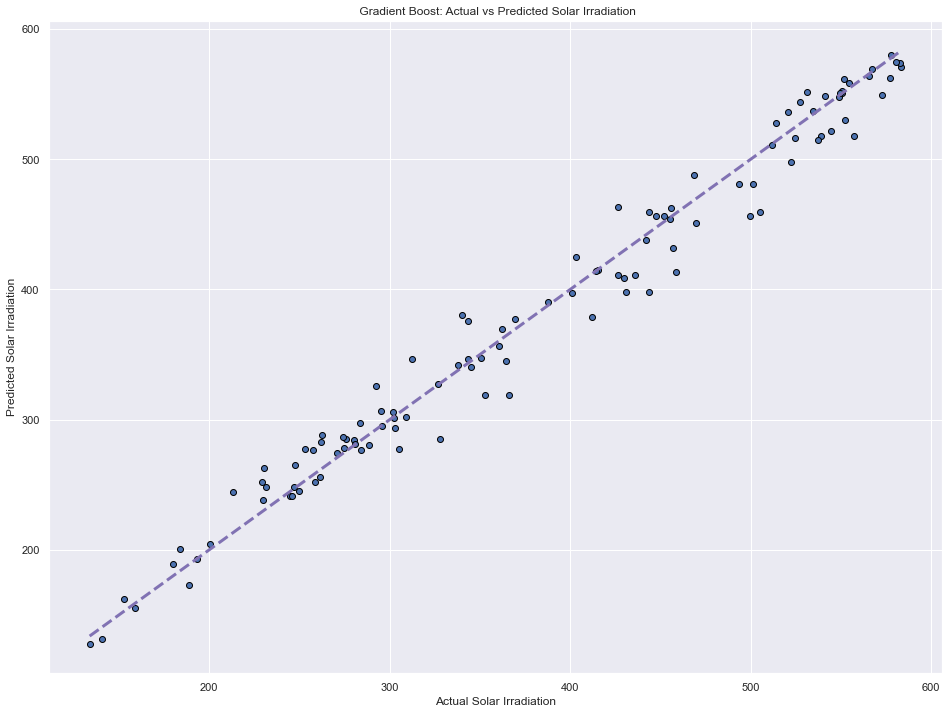

In [36]:
# Run the model against the test data presented through a plot
fig, pX = plt.subplots()

pX.scatter(y_test, y_pred_gbr, edgecolors = (0, 0, 0))
pX.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'm--', lw = 3)
pX.set_xlabel('Actual Solar Irradiation')
pX.set_ylabel('Predicted Solar Irradiation')
pX.set_title(" Gradient Boost: Actual vs Predicted Solar Irradiation")
plt.show()

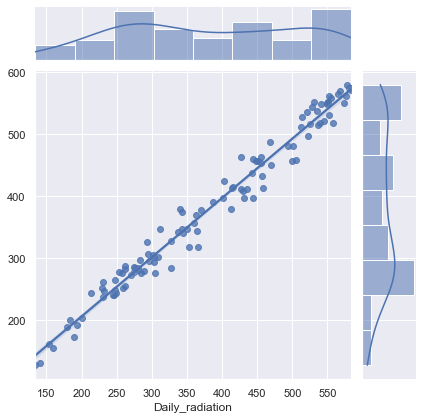

In [37]:
sns.jointplot(x=y_test, y=y_pred_gbr, kind = 'reg')
plt.show()

### Model Validation

In [38]:
# validation data
val_df = pd.read_csv('~/Desktop/working/HW-3-Solar-Enery-Project/datasets/cleaned/validation.csv')
X_val = val_df.drop(['Daily_radiation'], axis=1)
y_val = val_df['Daily_radiation']

In [39]:
# validate models
y_val_lr = pipeline_lr.predict(X_val)
y_val_rfr = pipeline_rfr.predict(X_val)
y_val_gbr = pipeline_gbr.predict(X_val)

In [40]:
# Evaluating algorithm performance for linear regression
mse_lr_val = mean_squared_error(y_val, y_val_lr, squared = False)

mae_lr_val = mean_absolute_error(y_val, y_val_lr)

print('r2_score: ', r2_score(y_val, y_val_lr))

print('Linear Regression - Root Mean Squared Error: %.2f' % np.sqrt(mse_lr_val))

print('Linear Regression - Root Mean Absolute Error: %.2f' % np.sqrt(mse_lr_val))

r2_score:  0.8719793640959541
Linear Regression - Root Mean Squared Error: 6.74
Linear Regression - Root Mean Absolute Error: 6.74


In [41]:
# Evaluating algorithm performance for random forest regression
mse_rf_val = mean_squared_error(y_val, y_val_rfr, squared = False)

mae_rf_val = mean_absolute_error(y_val, y_val_rfr)

print('r2_score: ', r2_score(y_val, y_val_rfr))

print('Random Forest - Root Mean Squared Error: %.2f' % np.sqrt(mse_rf_val))

print('Random Forest - Root Mean Absolute Error: %.2f' % np.sqrt(mse_rf_val))

r2_score:  0.9803412374805159
Random Forest - Root Mean Squared Error: 4.22
Random Forest - Root Mean Absolute Error: 4.22


In [100]:
# Evaluating algorithm performance for gradient boost regression
mse_gbr_val = mean_squared_error(y_val, y_val_gbr, squared = False)

mae_gbr_val = mean_absolute_error(y_val, y_val_gbr)

print('r2_score: ', r2_score(y_val, y_val_gbr))

print('Gradient Boost - Root Mean Squared Error: %.2f' % np.sqrt(mse_gbr_val))

print('Gradient Boost - Root Mean Absolute Error: %.2f' % np.sqrt(mae_gbr_val))

r2_score:  0.9816701500112919
Gradient Boost - Root Mean Squared Error: 4.13
Gradient Boost - Root Mean Absolute Error: 3.70
